In [299]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import sys

In [300]:
def get_centroids(K,X,m):
    centroids = {}
    for i in range(K):
        rand=random.randint(0,m-1)
        centroids['c'+str(i+1)] = list(X[rand])
    return centroids
    

In [301]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [302]:
def get_values(K,n_iter,X, centroids,m):
    output={}
    for key,value in centroids.items():
        output[key] = [] 
    for row in range(m):
        min_dis = sys.maxsize
        min_val = 'c1'
        for key,value in centroids.items():
            dis = calc_distance(X[row],value)
            if(dis<min_dis):
                min_dis = dis
                min_val = key
        output[min_val].append(row)

    Y={}
    for i in range(n_iter):
        centroids = {}
        for key,values in output.items():
            x=0;y=0
            for j in values:
                x+=X[j][0]
                y+=X[j][1]
            centroids[key] = [x/len(values),y/len(values)]
        output={}
        for key,value in centroids.items():
            output[key] = [] 
        for row in range(m):
            min_dis = sys.maxsize
            min_val = 'c1'
            for key,value in centroids.items():
                dis = calc_distance(X[row],value)
                if(dis<min_dis):
                    min_dis = dis
                    min_val = key
            output[min_val].append(row)
    return output, centroids

In [303]:
def k_means(K,n_iter,X):
    
    m=X.shape[0]
    n=X.shape[1]
    
    centroids = get_centroids(K,X,m)
    output, centroids = get_values(K,n_iter,X, centroids,m)
    
    final = []
    for key, values in output.items():
        li=[]
        li1=[]
        li2=[]
        for i in values:
            li1.append(X[i][0])
            li2.append(X[i][1])
        li.append(li1)
        li.append(li2)
        final.append(li)

    final_c = []
    li1=[]
    li2=[]
    for key, values in centroids.items():  
        li1.append(values[0])
        li2.append(values[1])
    final_c.append(li1)
    final_c.append(li2)
    return final, final_c

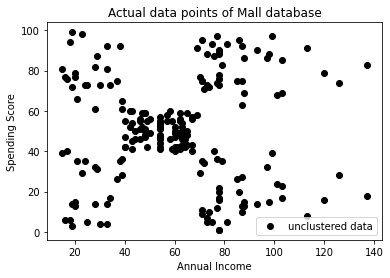

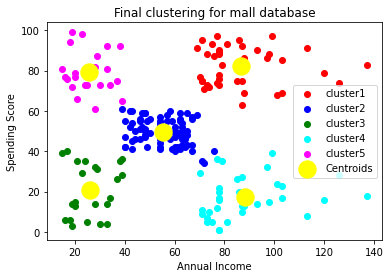

In [304]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.describe()
dataset=dataset.values
X=dataset[:,3:]

K=5
final, final_c = k_means(K,100,X)

plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Actual data points of Mall database')
plt.show()


color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(final[k][0],final[k][1],c=color[k],label=labels[k])
plt.scatter(final_c[0],final_c[1],s=300,c='yellow',label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Final clustering for mall database')
plt.show()

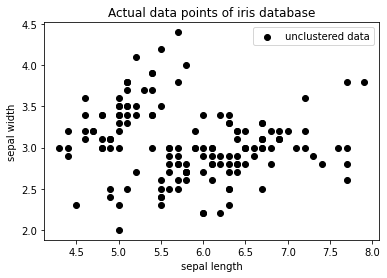

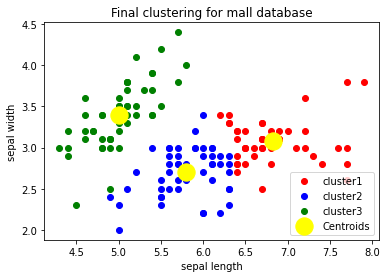

In [298]:
dataset=pd.read_csv('iris.csv')
dataset.describe()
dataset=dataset.values
X=dataset[:,:2]

K=3
final, final_c = k_means(3,50,X)

plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.title('Actual data points of iris database')
plt.show()


color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(final[k][0],final[k][1],c=color[k],label=labels[k])
plt.scatter(final_c[0],final_c[1],s=300,c='yellow',label='Centroids')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.title('Final clustering for iris database')
plt.show()